# Chapter 6: Discrete Random Variables

Welcome to Part 3 of our journey! We've built a solid foundation in basic probability, counting, conditional probability, and independence. Now, we introduce a central concept that bridges probability theory and data analysis: the **Random Variable**. Random variables allow us to quantitatively describe the outcomes of random phenomena. In this chapter, we'll focus specifically on **Discrete Random Variables**, which take on a finite or countably infinite number of values. We'll learn how to describe their behavior using Probability Mass Functions (PMFs) and Cumulative Distribution Functions (CDFs), and how to summarize them using measures like Expected Value (Mean) and Variance.

## What is a Random Variable?

In many experiments, we're not interested in the specific outcome itself, but rather in some numerical property associated with that outcome.

**Definition:** A **Random Variable** is a variable whose value is a numerical outcome of a random phenomenon. More formally, it's a function that maps each outcome in the sample space $\Omega$ to a real number.

We typically denote random variables with uppercase letters (e.g., $X, Y, Z$) and their specific values with lowercase letters (e.g., $x, y, z$).

**Types of Random Variables:**
1.  **Discrete Random Variable:** A random variable that can only take on a finite or countably infinite number of distinct values. Often associated with counting processes.
2.  **Continuous Random Variable:** A random variable that can take on any value within a given range or interval. Often associated with measurement processes. (We'll cover these in Chapter 8).

**Example:** Consider rolling a fair six-sided die.
* The sample space is $\Omega = \{1, 2, 3, 4, 5, 6\}$.
* We can define a random variable $X$ to be the number shown on the die after the roll. $X$ maps each outcome (which is already a number in this case) to itself.
* $X$ is a **discrete random variable** because it can only take on the specific values $\{1, 2, 3, 4, 5, 6\}$.

**Another Example:** Consider flipping a coin twice.
* The sample space is $\Omega = \{HH, HT, TH, TT\}$.
* Let $Y$ be the random variable representing the *number of heads* obtained.
* $Y$ maps the outcomes to numbers: $Y(HH) = 2$, $Y(HT) = 1$, $Y(TH) = 1$, $Y(TT) = 0$.
* $Y$ is a **discrete random variable** because it can only take on the values $\{0, 1, 2\}$.

## Probability Mass Function (PMF)

For a discrete random variable, we want to know the probability associated with each possible value it can take. This is captured by the Probability Mass Function (PMF).

**Definition:** The **Probability Mass Function (PMF)** of a discrete random variable $X$ is a function, denoted by $p_X(x)$ or simply $p(x)$, that gives the probability that $X$ is exactly equal to some value $x$.
$$ p_X(x) = P(X = x) $$

A valid PMF must satisfy two conditions:
1.  $p_X(x) \ge 0$ for all possible values $x$. (Probabilities cannot be negative).
2.  $\sum_{x} p_X(x) = 1$, where the sum is taken over all possible values $x$ that $X$ can assume. (The total probability must be 1).

**Example:** For the fair die roll, let $X$ be the outcome. The possible values are $\{1, 2, 3, 4, 5, 6\}$. Since the die is fair, each outcome has a probability of $\frac{1}{6}$. The PMF is:
$$
p_X(x) =
\begin{cases}
1/6 & \text{if } x \in \{1, 2, 3, 4, 5, 6\} \\
0 & \text{otherwise}
\end{cases}
$$
So, $P(X=1) = 1/6$, $P(X=2) = 1/6$, ..., $P(X=6) = 1/6$. The sum is $6 \times \frac{1}{6} = 1$.

Let's represent and visualize this PMF in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import rv_discrete

In [2]:
# Set plot style
sns.set(style="whitegrid")

In [3]:
# Define the possible outcomes (values) and their probabilities for the die roll
die_values = np.arange(1, 7) # Possible values x: 1, 2, 3, 4, 5, 6
die_probs = np.array([1/6] * 6) # P(X=x) for each value

In [4]:
# Create a dictionary for easier lookup
die_pmf_dict = {val: prob for val, prob in zip(die_values, die_probs)}
print(f"PMF Dictionary: {die_pmf_dict}")
print(f"Sum of probabilities: {sum(die_pmf_dict.values())}")

PMF Dictionary: {1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666}
Sum of probabilities: 0.9999999999999999


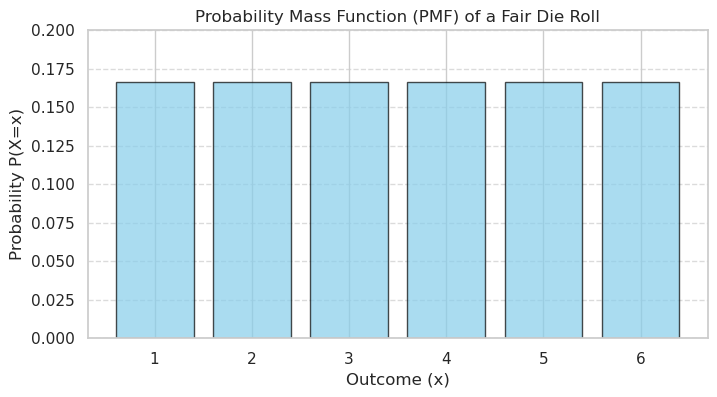

In [5]:
# Visualize the PMF
plt.figure(figsize=(8, 4))
plt.bar(die_values, die_probs, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Outcome (x)")
plt.ylabel("Probability P(X=x)")
plt.title("Probability Mass Function (PMF) of a Fair Die Roll")
plt.xticks(die_values)
plt.ylim(0, 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Cumulative Distribution Function (CDF)

Sometimes, we are interested not just in the probability of $X$ being *exactly* a certain value, but in the probability that $X$ is *less than or equal to* a certain value. This is captured by the Cumulative Distribution Function (CDF).

**Definition:** The **Cumulative Distribution Function (CDF)** of a random variable $X$ (discrete or continuous), denoted by $F_X(x)$ or simply $F(x)$, gives the probability that $X$ takes on a value less than or equal to $x$.
$$ F_X(x) = P(X \le x) $$
For a discrete random variable $X$, the CDF is calculated by summing the PMF values for all outcomes less than or equal to $x$:
$$ F_X(x) = \sum_{k \le x} p_X(k) $$

**Properties of a CDF:**
1.  $0 \le F_X(x) \le 1$ for all $x$.
2.  $F_X(x)$ is a non-decreasing function of $x$: if $a < b$, then $F_X(a) \le F_X(b)$.
3.  $\lim_{x \to -\infty} F_X(x) = 0$ and $\lim_{x \to +\infty} F_X(x) = 1$.
4.  For a discrete random variable, the CDF is a step function, increasing at the points where the PMF is positive.
5.  $P(X > x) = 1 - F_X(x)$.
6.  $P(a < X \le b) = F_X(b) - F_X(a)$ for $a < b$.
7.  $P(X=x) = F_X(x) - \lim_{y \to x^-} F_X(y)$ (the size of the jump at $x$).

**Example:** For the fair die roll $X$:
* $F_X(0) = P(X \le 0) = 0$
* $F_X(1) = P(X \le 1) = P(X=1) = 1/6$
* $F_X(2) = P(X \le 2) = P(X=1) + P(X=2) = 1/6 + 1/6 = 2/6$
* $F_X(3) = P(X \le 3) = P(X=1) + P(X=2) + P(X=3) = 3/6$
* ...
* $F_X(6) = P(X \le 6) = 6/6 = 1$
* $F_X(6.5) = P(X \le 6.5) = P(X \le 6) = 1$

Let's calculate and visualize the CDF.

In [6]:
# Calculate the CDF values
die_cdf_values = np.cumsum(die_probs)
print(f"CDF Values: {die_cdf_values}")

CDF Values: [0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


In [7]:
# Create a function representation of the CDF
def die_cdf_func(x):
    if x < 1:
        return 0.0
    elif x >= 6:
        return 1.0
    else:
        # Find the largest integer <= x that is in our die_values
        idx = np.searchsorted(die_values, x, side='right') - 1
        return die_cdf_values[idx]

In [8]:
# Test the function
print(f"F(0.5) = {die_cdf_func(0.5)}")
print(f"F(3) = {die_cdf_func(3)}")
print(f"F(3.7) = {die_cdf_func(3.7)}")
print(f"F(6) = {die_cdf_func(6)}")
print(f"F(10) = {die_cdf_func(10)}")

F(0.5) = 0.0
F(3) = 0.5
F(3.7) = 0.5
F(6) = 1.0
F(10) = 1.0


In [9]:
# Visualize the CDF
x_plot = np.linspace(-1, 8, 500) # Range for plotting
y_plot = [die_cdf_func(val) for val in x_plot]

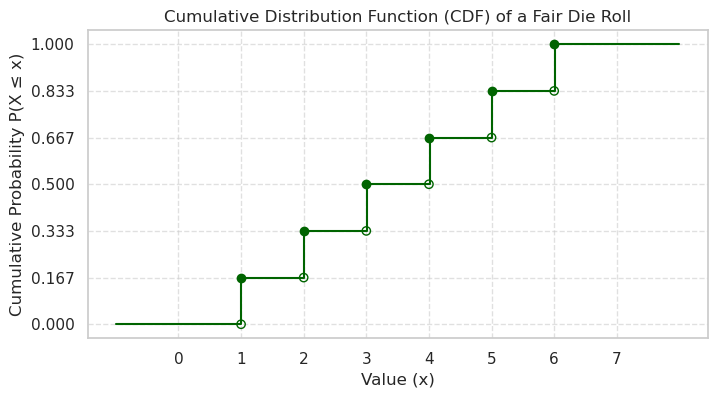

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(x_plot, y_plot, drawstyle='steps-post', linestyle='-', color='darkgreen') # 'steps-post' creates the step function look
# Add points at the jumps
plt.scatter(die_values, die_cdf_values, color='darkgreen', zorder=5)
plt.scatter(die_values, die_cdf_values - die_probs, facecolors='none', edgecolors='darkgreen', zorder=5) # Open circles below jumps

plt.xlabel("Value (x)")
plt.ylabel("Cumulative Probability P(X ≤ x)")
plt.title("Cumulative Distribution Function (CDF) of a Fair Die Roll")
plt.xticks(np.arange(0, 8))
plt.yticks(np.linspace(0, 1, 7)) # Ticks for 0, 1/6, 2/6, ..., 1
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.ylim(-0.05, 1.05)
plt.show()

## Expected Value (Mean)

The expected value, or mean, of a discrete random variable is a weighted average of its possible values, where the weights are the probabilities (PMF values). It represents the long-run average value we would expect if we observed the random variable many times.

**Definition:** The **Expected Value** (or **Mean**) of a discrete random variable $X$, denoted by $E[X]$ or $\mu_X$, is defined as:
$$ E[X] = \mu_X = \sum_{x} x \cdot p_X(x) $$
where the sum is over all possible values $x$ that $X$ can take.

The expected value doesn't have to be one of the possible values of $X$.

**Example:** For the fair die roll $X$:
$$
\begin{align*}
E[X] &= (1 \times \frac{1}{6}) + (2 \times \frac{1}{6}) + (3 \times \frac{1}{6}) + (4 \times \frac{1}{6}) + (5 \times \frac{1}{6}) + (6 \times \frac{1}{6}) \\
&= \frac{1+2+3+4+5+6}{6} \\
&= \frac{21}{6} \\
&= 3.5
\end{align*}
$$
Even though the die can never land on 3.5, the long-run average value of many rolls is expected to be 3.5.

In [11]:
# Calculate the expected value
expected_value = np.sum(die_values * die_probs)
# Alternatively using dot product:
# expected_value = np.dot(die_values, die_probs)

In [12]:
print(f"Theoretical Expected Value E[X]: {expected_value}")

Theoretical Expected Value E[X]: 3.5


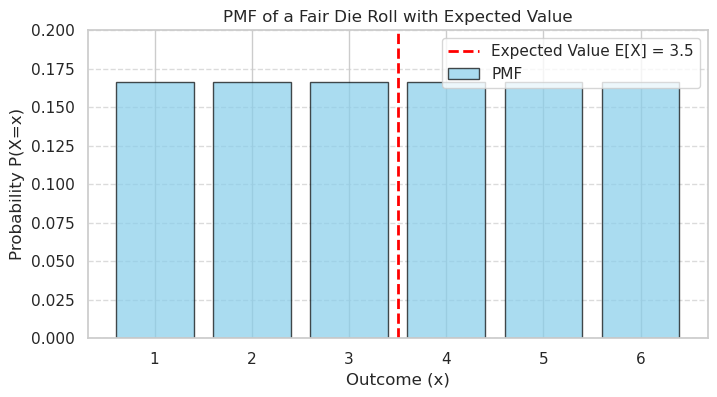

In [13]:
# Visualize the mean on the PMF plot
plt.figure(figsize=(8, 4))
plt.bar(die_values, die_probs, color='skyblue', edgecolor='black', alpha=0.7, label='PMF')
plt.axvline(expected_value, color='red', linestyle='--', linewidth=2, label=f'Expected Value E[X] = {expected_value:.1f}')
plt.xlabel("Outcome (x)")
plt.ylabel("Probability P(X=x)")
plt.title("PMF of a Fair Die Roll with Expected Value")
plt.xticks(die_values)
plt.ylim(0, 0.2)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Variance and Standard Deviation

While the expected value tells us the center of the distribution, the variance and standard deviation measure the *spread* or *dispersion* of the random variable's values around the mean.

**Definition:** The **Variance** of a random variable $X$, denoted by $Var(X)$ or $\sigma_X^2$, is the expected value of the squared difference between $X$ and its mean $E[X] = \mu_X$.
$$ Var(X) = \sigma_X^2 = E[(X - \mu_X)^2] $$
For a discrete random variable, this is calculated as:
$$ Var(X) = \sum_{x} (x - \mu_X)^2 \cdot p_X(x) $$

A computationally simpler formula for variance is often used:
$$ Var(X) = E[X^2] - (E[X])^2 $$
where $E[X^2] = \sum_{x} x^2 \cdot p_X(x)$.

**Definition:** The **Standard Deviation** of a random variable $X$, denoted by $SD(X)$ or $\sigma_X$, is the positive square root of the variance.
$$ SD(X) = \sigma_X = \sqrt{Var(X)} $$
The standard deviation is often preferred because it has the same units as the random variable $X$.

**Example:** For the fair die roll $X$, we know $\mu_X = 3.5$.
Let's calculate $E[X^2]$ first:
$$
\begin{align*}
E[X^2] &= (1^2 \times \frac{1}{6}) + (2^2 \times \frac{1}{6}) + (3^2 \times \frac{1}{6}) + (4^2 \times \frac{1}{6}) + (5^2 \times \frac{1}{6}) + (6^2 \times \frac{1}{6}) \\
&= \frac{1 + 4 + 9 + 16 + 25 + 36}{6} \\
&= \frac{91}{6} \approx 15.167
\end{align*}
$$
Now, calculate the variance:
$$
\begin{align*}
Var(X) &= E[X^2] - (E[X])^2 \\
&= \frac{91}{6} - (3.5)^2 \\
&= \frac{91}{6} - (7/2)^2 \\
&= \frac{91}{6} - \frac{49}{4} \\
&= \frac{182}{12} - \frac{147}{12} \\
&= \frac{35}{12} \approx 2.917
\end{align*}
$$
And the standard deviation:
$$ SD(X) = \sigma_X = \sqrt{\frac{35}{12}} \approx \sqrt{2.917} \approx 1.708 $$

In [14]:
# Calculate E[X^2]
e_x_squared = np.sum((die_values**2) * die_probs)
print(f"E[X^2]: {e_x_squared:.4f} (Exact: 91/6)")

E[X^2]: 15.1667 (Exact: 91/6)


In [15]:
# Calculate Variance using the computational formula
variance = e_x_squared - (expected_value**2)
print(f"Theoretical Variance Var(X): {variance:.4f} (Exact: 35/12)")

Theoretical Variance Var(X): 2.9167 (Exact: 35/12)


In [16]:
# Alternatively, calculate using the definition: E[(X - mu)^2]
variance_def = np.sum(((die_values - expected_value)**2) * die_probs)
print(f"Variance using definition: {variance_def:.4f}")

Variance using definition: 2.9167


In [17]:
# Calculate Standard Deviation
std_dev = np.sqrt(variance)
print(f"Theoretical Standard Deviation SD(X): {std_dev:.4f} (Exact: sqrt(35/12))")

Theoretical Standard Deviation SD(X): 1.7078 (Exact: sqrt(35/12))


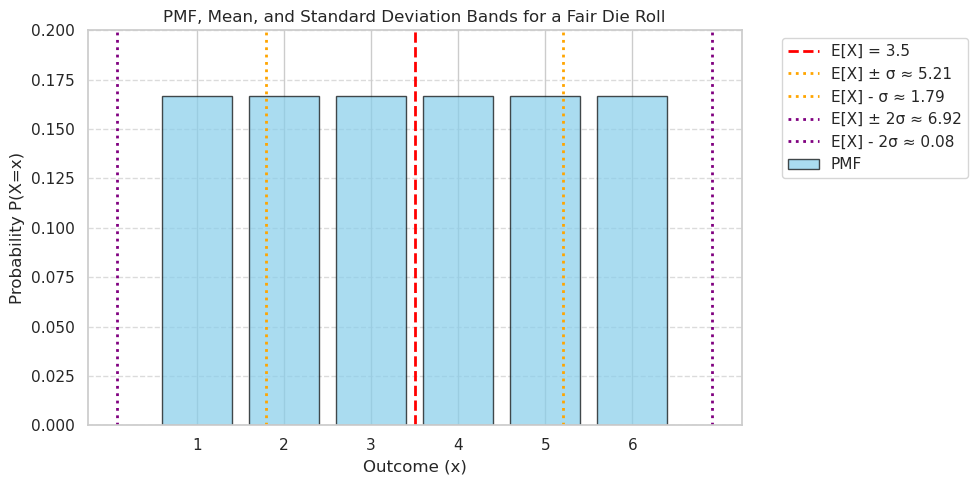

In [18]:
# Visualize the standard deviation on the PMF plot
plt.figure(figsize=(10, 5))
plt.bar(die_values, die_probs, color='skyblue', edgecolor='black', alpha=0.7, label='PMF')
plt.axvline(expected_value, color='red', linestyle='--', linewidth=2, label=f'E[X] = {expected_value:.1f}')

# Add lines for +/- 1 standard deviation
plt.axvline(expected_value + std_dev, color='orange', linestyle=':', linewidth=2, label=f'E[X] ± σ ≈ {expected_value+std_dev:.2f}')
plt.axvline(expected_value - std_dev, color='orange', linestyle=':', linewidth=2, label=f'E[X] - σ ≈ {expected_value-std_dev:.2f}')

# Add lines for +/- 2 standard deviations
plt.axvline(expected_value + 2*std_dev, color='purple', linestyle=':', linewidth=2, label=f'E[X] ± 2σ ≈ {expected_value+2*std_dev:.2f}')
plt.axvline(expected_value - 2*std_dev, color='purple', linestyle=':', linewidth=2, label=f'E[X] - 2σ ≈ {expected_value-2*std_dev:.2f}')

plt.xlabel("Outcome (x)")
plt.ylabel("Probability P(X=x)")
plt.title("PMF, Mean, and Standard Deviation Bands for a Fair Die Roll")
plt.xticks(die_values)
plt.ylim(0, 0.2)
# Adjust legend placement
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to make room for legend
plt.show()

## Functions of a Random Variable

Often, we are interested in a quantity that is derived from a random variable. If $X$ is a random variable and $g$ is a function, then $Y = g(X)$ is also a random variable.

If $X$ is discrete with PMF $p_X(x)$, we can find the PMF of $Y = g(X)$, denoted $p_Y(y)$, by summing the probabilities of all $x$ values such that $g(x) = y$:
$$ p_Y(y) = P(Y=y) = P(g(X)=y) = \sum_{x: g(x)=y} p_X(x) $$

**Expected Value of a Function of a Random Variable (LOTUS):**
A very useful result, sometimes called the Law of the Unconscious Statistician (LOTUS), allows us to calculate the expected value of $Y=g(X)$ without explicitly finding the PMF of $Y$.
$$ E[Y] = E[g(X)] = \sum_{x} g(x) \cdot p_X(x) $$
Notice this is similar to the definition of $E[X]$, but we replace $x$ with $g(x)$. This is how we calculated $E[X^2]$ earlier, where $g(x) = x^2$.

**Example:** Let $X$ be the outcome of a fair die roll. Let $Y = X^2$. What are the PMF and expected value of $Y$?
* The possible values of $X$ are $\{1, 2, 3, 4, 5, 6\}$, each with probability $1/6$.
* The possible values of $Y = X^2$ are $\{1^2, 2^2, 3^2, 4^2, 5^2, 6^2\} = \{1, 4, 9, 16, 25, 36\}$.
* Since each $x$ value maps to a unique $y=x^2$ value, the probability of each $y$ is the same as the probability of the corresponding $x$.
* The PMF of $Y$ is:
    $p_Y(y) = 1/6$ for $y \in \{1, 4, 9, 16, 25, 36\}$, and $0$ otherwise.

* The expected value of $Y$ can be calculated using its PMF:
    $E[Y] = (1 \times \frac{1}{6}) + (4 \times \frac{1}{6}) + (9 \times \frac{1}{6}) + (16 \times \frac{1}{6}) + (25 \times \frac{1}{6}) + (36 \times \frac{1}{6}) = \frac{91}{6}$
* Alternatively, using LOTUS:
    $E[Y] = E[X^2] = \sum_{x=1}^{6} x^2 \cdot p_X(x) = \sum_{x=1}^{6} x^2 \cdot \frac{1}{6} = \frac{1^2+2^2+3^2+4^2+5^2+6^2}{6} = \frac{91}{6}$

This confirms our earlier calculation of $E[X^2]$.

In [19]:
# Define the function g(x) = x^2
def g(x):
  return x**2

In [20]:
# Possible values for X and Y
x_values = die_values
y_values = g(x_values)

In [21]:
# PMF for Y (since g(x) is one-to-one for x in {1..6}, probs are the same)
y_probs = die_probs

In [22]:
# PMF dictionary for Y
y_pmf_dict = {val_y: prob for val_y, prob in zip(y_values, y_probs)}
print(f"PMF Dictionary for Y=X^2: {y_pmf_dict}")

PMF Dictionary for Y=X^2: {1: 0.16666666666666666, 4: 0.16666666666666666, 9: 0.16666666666666666, 16: 0.16666666666666666, 25: 0.16666666666666666, 36: 0.16666666666666666}


In [23]:
# Calculate E[Y] using the PMF of Y
expected_value_y = np.sum(y_values * y_probs)
print(f"E[Y] calculated using PMF of Y: {expected_value_y:.4f} (Exact: 91/6)")

E[Y] calculated using PMF of Y: 15.1667 (Exact: 91/6)


In [24]:
# Calculate E[Y] = E[g(X)] using LOTUS
expected_value_y_lotus = np.sum(g(x_values) * die_probs)
print(f"E[Y] calculated using LOTUS E[g(X)]: {expected_value_y_lotus:.4f} (Exact: 91/6)")

E[Y] calculated using LOTUS E[g(X)]: 15.1667 (Exact: 91/6)


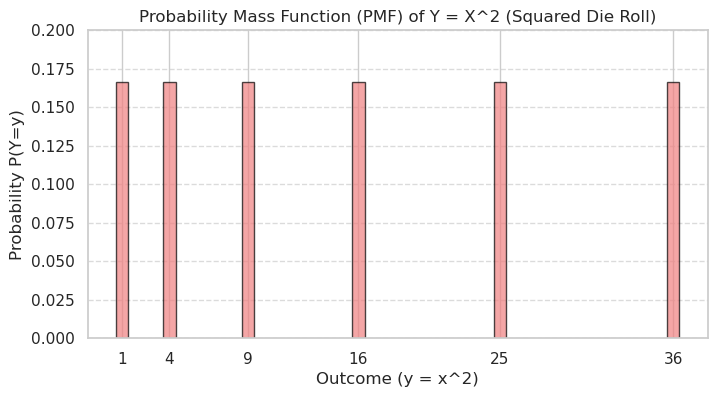

In [25]:
# Visualize the PMF of Y = X^2
plt.figure(figsize=(8, 4))
plt.bar(y_values, y_probs, color='lightcoral', edgecolor='black', alpha=0.7)
plt.xlabel("Outcome (y = x^2)")
plt.ylabel("Probability P(Y=y)")
plt.title("Probability Mass Function (PMF) of Y = X^2 (Squared Die Roll)")
plt.xticks(y_values)
plt.ylim(0, 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Hands-on: Simulation and Comparison

The Law of Large Numbers (which we'll study later) tells us that if we simulate a random variable many times, the average of the outcomes (the *sample mean*) should get close to the theoretical expected value $E[X]$. Similarly, the variance of the outcomes (the *sample variance*) should approach $Var(X)$. Let's verify this for our die roll example.

We will:
1.  Simulate a large number of fair die rolls using `numpy.random.randint`.
2.  Calculate the sample mean and sample variance of the simulated outcomes.
3.  Compare these empirical results to the theoretical values ($E[X]=3.5$, $Var(X) \approx 2.917$).
4.  Visualize the distribution of the simulated outcomes (empirical PMF) and compare it to the theoretical PMF.
5.  Visualize the empirical CDF and compare it to the theoretical CDF.

In [26]:
# Number of simulations
num_simulations = 10000

In [27]:
# Simulate die rolls
simulated_rolls = np.random.randint(1, 7, size=num_simulations) # Generates integers from 1 (inclusive) to 7 (exclusive)

In [28]:
# Calculate empirical mean and variance
sample_mean = np.mean(simulated_rolls)
# Note: Use ddof=1 for sample variance (unbiased estimator), though for large N, it matters little.
sample_variance = np.var(simulated_rolls, ddof=1)
sample_std_dev = np.std(simulated_rolls, ddof=1)

In [29]:
# Compare empirical vs theoretical
print(f"--- Comparison after {num_simulations} simulations ---")
print(f"Theoretical E[X]: {expected_value:.4f}")
print(f"Sample Mean:      {sample_mean:.4f}")
print(f"Difference (Mean): {abs(sample_mean - expected_value):.4f}\n")

--- Comparison after 10000 simulations ---
Theoretical E[X]: 3.5000
Sample Mean:      3.4943
Difference (Mean): 0.0057



In [30]:
print(f"Theoretical Var(X): {variance:.4f}")
print(f"Sample Variance:    {sample_variance:.4f}")
print(f"Difference (Var):   {abs(sample_variance - variance):.4f}\n")

Theoretical Var(X): 2.9167
Sample Variance:    2.9685
Difference (Var):   0.0518



In [31]:
print(f"Theoretical SD(X): {std_dev:.4f}")
print(f"Sample Std Dev:     {sample_std_dev:.4f}")
print(f"Difference (SD):    {abs(sample_std_dev - std_dev):.4f}")

Theoretical SD(X): 1.7078
Sample Std Dev:     1.7229
Difference (SD):    0.0151


### Visualizing Empirical vs Theoretical Distributions

Now let's plot the frequencies of our simulated results and compare them to the theoretical probabilities (PMF), and do the same for the cumulative distributions (CDF).

In [32]:
# Calculate empirical PMF (frequencies)
unique_outcomes, counts = np.unique(simulated_rolls, return_counts=True)
empirical_pmf = counts / num_simulations

In [33]:
# Calculate empirical CDF
empirical_cdf = np.cumsum(empirical_pmf)

In [34]:
# Plotting Empirical PMF vs Theoretical PMF
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

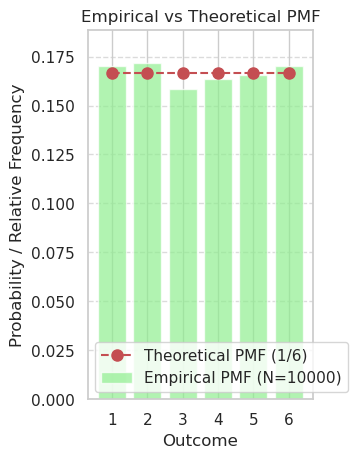

In [35]:
plt.subplot(1, 2, 1)
# Empirical PMF (bars)
plt.bar(unique_outcomes, empirical_pmf, color='lightgreen', alpha=0.7, label=f'Empirical PMF (N={num_simulations})')
# Theoretical PMF (lines/markers)
plt.plot(die_values, die_probs, 'ro--', markersize=8, label='Theoretical PMF (1/6)')
plt.xlabel("Outcome")
plt.ylabel("Probability / Relative Frequency")
plt.title("Empirical vs Theoretical PMF")
plt.xticks(die_values)
plt.ylim(0, max(np.max(empirical_pmf), np.max(die_probs)) * 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

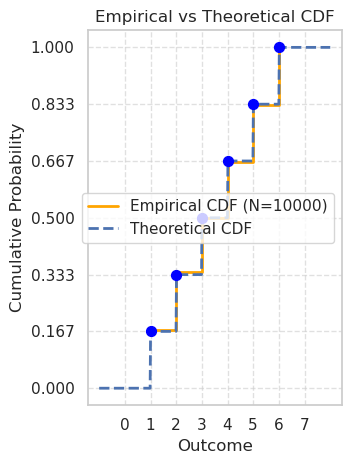

In [36]:
# Plotting Empirical CDF vs Theoretical CDF
plt.subplot(1, 2, 2)
# Empirical CDF
plt.step(unique_outcomes, empirical_cdf, where='post', color='orange', linewidth=2, label=f'Empirical CDF (N={num_simulations})')
# Theoretical CDF
x_plot_cdf = np.linspace(-1, 8, 500)
y_plot_cdf = [die_cdf_func(val) for val in x_plot_cdf]
plt.plot(x_plot_cdf, y_plot_cdf, 'b--', linewidth=2, label='Theoretical CDF')
# Add markers for theoretical jumps
plt.scatter(die_values, die_cdf_values, color='blue', zorder=5, s=50)

plt.xlabel("Outcome")
plt.ylabel("Cumulative Probability")
plt.title("Empirical vs Theoretical CDF")
plt.xticks(np.arange(0, 8))
plt.yticks(np.linspace(0, 1, 7))
plt.ylim(-0.05, 1.05)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

As you can see from the simulation results and the plots, the empirical values (sample mean, sample variance, empirical PMF/CDF) obtained from a large number of simulations closely approximate the theoretical values we derived. This demonstrates the connection between probability theory and real-world observations or simulations.

## Summary

In this chapter, we introduced the fundamental concept of a discrete random variable.
* A **Random Variable** assigns a numerical value to each outcome of a random experiment.
* A **Discrete Random Variable** takes on a finite or countably infinite number of values.
* The **Probability Mass Function (PMF)**, $p_X(x) = P(X=x)$, gives the probability for each possible value $x$.
* The **Cumulative Distribution Function (CDF)**, $F_X(x) = P(X \le x)$, gives the cumulative probability up to a value $x$.
* The **Expected Value (Mean)**, $E[X] = \sum x \cdot p_X(x)$, represents the long-run average value.
* The **Variance**, $Var(X) = E[(X - E[X])^2] = E[X^2] - (E[X])^2$, measures the spread around the mean.
* The **Standard Deviation**, $SD(X) = \sqrt{Var(X)}$, also measures spread but in the original units.
* We can analyze **Functions of Random Variables**, $Y = g(X)$, and find their PMFs and expected values (using LOTUS: $E[g(X)] = \sum g(x) p_X(x)$).
* Simulations using Python (`numpy`) allow us to generate empirical data that converges to theoretical probability distributions and their parameters as the number of simulations increases.

In the next chapter, we will explore several important families of discrete distributions that model common real-world scenarios.

---
## Exercises

1.  **Biased Coin:** Consider a biased coin where the probability of getting Heads (H) is $P(H) = 0.7$. Let $X$ be the random variable representing the number of heads in a single flip (so $X=1$ for Heads, $X=0$ for Tails).
    a.  What is the PMF of $X$?
    b.  What is the CDF of $X$? Plot it.
    c.  Calculate the expected value $E[X]$.
    d.  Calculate the variance $Var(X)$ and standard deviation $SD(X)$.

2.  **Two Dice Sum:** Let $X$ be the random variable representing the sum of the outcomes when two fair six-sided dice are rolled.
    a.  What are the possible values for $X$?
    b.  Determine the PMF of $X$. (Hint: There are 36 equally likely outcomes for the pair of dice.)
    c.  Calculate $E[X]$. Is there an easier way than using the PMF directly? (Hint: Linearity of Expectation)
    d.  Calculate $Var(X)$. (Hint: Variance of sums of independent variables)
    e.  Find $P(X > 7)$.
    f.  Find $P(X \text{ is even})$.

3.  **Game Value:** You pay £2 to play a game. You roll a fair six-sided die. If you roll a 6, you win £5 (getting your £2 back plus £3 profit). If you roll a 4 or 5, you win £2 (getting your £2 back). If you roll a 1, 2, or 3, you win nothing (losing your £2). Let $W$ be the random variable representing your *net* winnings (profit/loss) from playing the game once.
    a.  What are the possible values for $W$?
    b.  Determine the PMF of $W$.
    c.  Calculate the expected net winnings $E[W]$. Is this a fair game? (A fair game has $E[W]=0$).
    d.  Calculate the variance $Var(W)$.

4.  **Simulation Comparison:** Simulate rolling two fair dice and calculating their sum $10,000$ times.
    a.  Calculate the sample mean and sample variance of the simulated sums.
    b.  Compare these to the theoretical values you calculated in Exercise 2.
    c.  Plot the empirical PMF of the simulated sums and compare it to the theoretical PMF from Exercise 2.

---

*(Solutions/Hints Appendix)*

In [37]:
# Example code structure for Exercise 1 (students to fill in)
# Exercise 1: Biased Coin
p_heads = 0.7
p_tails = 1 - p_heads

In [38]:
# a) PMF
x_values_coin = np.array([0, 1]) # 0 for Tails, 1 for Heads
pmf_coin = np.array([p_tails, p_heads])
pmf_coin_dict = {val: prob for val, prob in zip(x_values_coin, pmf_coin)}
print(f"Ex 1(a) - PMF: {pmf_coin_dict}")

Ex 1(a) - PMF: {0: 0.30000000000000004, 1: 0.7}


In [39]:
# b) CDF
cdf_coin_values = np.cumsum(pmf_coin)
def coin_cdf_func(x):
    if x < 0: return 0.0
    if x >= 1: return 1.0
    return cdf_coin_values[0] # P(X<=0)
# (Plotting code would go here)

In [40]:
# c) Expected Value
ex_coin = np.sum(x_values_coin * pmf_coin)
print(f"Ex 1(c) - E[X]: {ex_coin}")

Ex 1(c) - E[X]: 0.7


In [41]:
# d) Variance
ex2_coin = np.sum((x_values_coin**2) * pmf_coin)
var_coin = ex2_coin - ex_coin**2
sd_coin = np.sqrt(var_coin)
print(f"Ex 1(d) - Var(X): {var_coin:.4f}")
print(f"Ex 1(d) - SD(X): {sd_coin:.4f}")

Ex 1(d) - Var(X): 0.2100
Ex 1(d) - SD(X): 0.4583
